# <img style="float: left; padding-right: 10px; width: 200px" src="https://graphic-language.eu/wp-content/uploads/2017/04/Screen-Shot-2017-04-10-at-15.13.45.png"> YMS31303 Metropolitan Data 1 (*Spatial* Data Science) 

## Assignment 3: Data Engineering and Transformation

**TU Delft for MADE**<br>
**Q1 2025**<br>
**Instructor:**  Theodoros CHATZIVASILEIADIS <br>
**Instructor:** Nan BAI <br>

---


__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

### NB: From now on you should submit 
1) your notebook with the answers, remember that comments are good practice
2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [1]:
# your code here
# use many cells if you like to structure your code well

%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot

#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\Documents\MADE\Y1_C02_MET_DATA\lab-02\lab-02'
fname = infodir + '\data\goodreads.csv'

#next, read the CVS file, and, after some reserarch and iterations, found this function that allows to insert a new row that works as index,
#because to me, the pre existing "titles" of each column looked more like actual entries, so, I lookd for a way to keep them in the dataframe
#and add the desired titles, not just replace them
week03m = pd.read_csv(fname, names=['rating', 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#this is to verify
week03m.head(), week03m.tail()
#it is possible to go from this bloc directly to the first bloc in exercise 2

(   rating  review_count        isbn         booktype  \
 0    4.40      136455.0  0439023483  good_reads:book   
 1    4.41       16648.0  0439358078  good_reads:book   
 2    3.56       85746.0  0316015849  good_reads:book   
 3    4.23       47906.0  0061120081  good_reads:book   
 4    4.23       34772.0  0679783261  good_reads:book   
 
                                           author_url    year  \
 0  https://www.goodreads.com/author/show/153394.S...  2008.0   
 1  https://www.goodreads.com/author/show/1077326....  2003.0   
 2  https://www.goodreads.com/author/show/941441.S...  2005.0   
 3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
 4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   
 
                                           genre_urls  \
 0  /genres/young-adult|/genres/science-fiction|/g...   
 1  /genres/fantasy|/genres/young-adult|/genres/fi...   
 2  /genres/young-adult|/genres/fantasy|/genres/ro...   
 3  /genres/classics|/genres/fiction

In [2]:
#to change the names of the columns, we use the rename function
week03mtr = week03m.rename(columns={'4.40': 'rating', '136455': 'review_count', '0439023483': 'isbn', 'good_reads:book': 'booktype', 'https://www.goodreads.com/author/show/153394.Suzanne_Collins': 'author_url', '2008': 'year', '/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action':'genre_urls', 'dir01/2767052-the-hunger-games.html': 'dir', '2958974': 'rating_count', 'The Hunger Games (The Hunger Games, #1)': 'name'})
week03mtr.head()
#no longer requiered after iteration that added the names

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


In [14]:
#no longer requiered after iteration that added the names
week03m.columns = ['rating', 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
week03m.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
2,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
3,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice
4,4.25,12363.0,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470.0,Gone with the Wind


In [6]:
#however, I believe we should put a row before our current names, because the current "names" match entries, instead of titles for the columns
#if we run with that, this should be added instead of replacing the data
#create a list with the desired titles
nt=[]
nt.insert (0, {'4.40': 'rating', '136455': 'review_count', '0439023483':'isbn', 'good_reads:book':'booktype', 'https://www.goodreads.com/author/show/153394.Suzanne_Collins':'author_url', '2008':'year', '/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action':'genre_urls', 'dir01/2767052-the-hunger-games.html':'dir', '2958974':'rating_count', 'The Hunger Games (The Hunger Games, #1)':'name'})
#insert the list by contatenating it
week03mta_s1 = pd.concat([pd.DataFrame(nt), week03m], ignore_index=True)
week03mta_s1.head()
#no longer requiered after iteration that added the names

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


In [10]:
week03mta_s1.rename(columns=week03mta_s1.iloc[0])
week03mta_s1.head()
#test
#thingy and thingy
#no longer requiered after iteration that added the names

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


In [9]:
week03mta_s1.columns = week03mta_s1.iloc[0]
week03mta_s1.iloc[pd.RangeIndex(len(week03mta_s1))]
week03mta_s1.head()
#no longer requiered after iteration that added the names

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [16]:
# your code here
# use many cells if you like to structure your code well

#considering lab-01-part-01 implied the existance of the function keep, I will try that, instead of drop
week03m_ss1 = week03m[['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']]
week03m_ss1.head(), week03m_ss1.tail()

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [17]:
# your code here
# use many cells if you like to structure your code well

#to identify how many missing values we have in each column, because .isna is a pandas method to detect this values:
print(week03m_ss1.isna().sum())

rating          2
isbn          477
author_url      2
year            7
genre_urls     62
name            2
dtype: int64


In [22]:
#not all the columns have the same relevance, and, in the following exercises the column 'rating' 
#is very valuable, so, the missing values in that column will become an issue,
#and should be the ones we drop, and we can work with all the other missing values as they are
week03m_ss1 = week03m_ss1.dropna(subset=['rating'])

In [24]:
#just to fill in the isbn values, for them to have a value
week03m_ss1['isbn'] = week03m_ss1['isbn'].fillna(-1)

## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [29]:
# your code here
# use many cells if you like to structure your code well

#this is to explore how the values in this column look like and choose how to do the parse
week03m_ss1['author_url'][0:4]

'https://www.goodreads.com/author/show/1077326.J_K_Rowling'

In [30]:
nan_rows = week03m_ss1[week03m_ss1['author_url'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [rating, isbn, author_url, year, genre_urls, name]
Index: []


In [31]:
week03m_ss1['author'] = week03m_ss1['author_url'].apply(lambda x: x.rsplit('.', 1)[-1])
week03m_ss1['author']

0       Suzanne_Collins
1           J_K_Rowling
2       Stephenie_Meyer
3            Harper_Lee
4           Jane_Austen
             ...       
5995    Candice_Millard
5996          Jenny_Han
5997       Kate_Avelynn
5998      A_id_al_Qarni
5999      R_A_Salvatore
Name: author, Length: 5998, dtype: object

In [32]:
week03m_ss1['author'] = week03m_ss1['author'].str.replace("_", " ")
week03m_ss1['author']

0       Suzanne Collins
1           J K Rowling
2       Stephenie Meyer
3            Harper Lee
4           Jane Austen
             ...       
5995    Candice Millard
5996          Jenny Han
5997       Kate Avelynn
5998      A id al Qarni
5999      R A Salvatore
Name: author, Length: 5998, dtype: object

In [33]:
nan_rows = week03m_ss1[week03m_ss1['year'].isna()]
print(nan_rows)

      rating        isbn                                         author_url  \
2442    4.23          -1  https://www.goodreads.com/author/show/623606.A...   
2869    4.61          -1  https://www.goodreads.com/author/show/8182217....   
5572    3.71  8423336603  https://www.goodreads.com/author/show/285658.E...   
5658    4.32          -1  https://www.goodreads.com/author/show/25307.Ro...   
5683    4.56          -1  https://www.goodreads.com/author/show/3097905....   

      year                                         genre_urls  \
2442   NaN  /genres/religion|/genres/islam|/genres/non-fic...   
2869   NaN                                                NaN   
5572   NaN                                    /genres/fiction   
5658   NaN  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683   NaN  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                   name  \
2442                                          La Tahzan   
2869  My Death E

In [34]:
week03m_ss1 = week03m_ss1.dropna(subset=['year'])

In [35]:
df_sorted = week03m_ss1.sort_values(by=['rating', 'year'], ascending=[False, True])
df_sorted.head(10)

,rating,isbn,author_url,year,genre_urls,name,author
2909,5.00,0983002215,https://www.goodreads.com/author/show/6589034....,2011.0,NaN,Family Secrets,Rebekah McClew
2145,5.00,1300589469,https://www.goodreads.com/author/show/6906561....,2012.0,NaN,A Book About Absolutely Nothing.,I M Nobody
2903,5.00,0983002282,https://www.goodreads.com/author/show/6589034....,2012.0,NaN,Obscured Darkness (Family Secrets #2),Rebekah McClew
4473,5.00,-1,https://www.goodreads.com/author/show/6896621....,2012.0,NaN,Patience's Love,Ronda Paige
5692,5.00,-1,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,Abstraction In Theory - Laws Of Physical Trans...,Subhajit Ganguly
1718,5.00,-1,https://www.goodreads.com/author/show/6467808....,2014.0,/genres/poetry|/genres/childrens,An Elephant Is On My House,Othen Donald Dale Cummings
5564,5.00,-1,https://www.goodreads.com/author/show/7738947....,2014.0,/genres/romance|/genres/new-adult,"Untainted (Photographer Trilogy, #3)",Sarah Robinson
2868,4.94,-1,https://www.goodreads.com/author/show/8127793....,2014.0,NaN,Nik Nassa & the Mark of Destiny,A J Salt
2920,4.93,1453634819,https://www.goodreads.com/author/show/4808225....,2010.0,NaN,The Years Distilled,Dennis Sharpe
2865,4.93,9789898541,https://www.goodreads.com/author/show/7458878....,2012.0,NaN,LaÃ§os fortes e decisÃµes difÃ­ceis,Gra a Jacinto


## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [36]:
# your code here
# use many cells if you like to structure your code well
df_sorted.to_csv("./data/hw-03-cleaned.csv", index=False)

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

#### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [2]:
# your code here
# use many cells if you like to structure your code well

#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir2 = r'C:\Users\EPRO\Documents\MADE\Y1_C02_MET_DATA\lab-02\lab-02'
fname2 = infodir2 + '\data\cleaned-goodreads.csv'

#this is to verify
week03m_df2 = pd.read_csv(fname2)
week03m_df2.head()

,rating,review_count,isbn,booktype,author_url,year,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [4]:
week03m_df2['rating_count'].corr(week03m_df2['rating'])

np.float64(-0.028451617980118547)

In [7]:
corr = week03m_df2['rating_count'].corr(week03m_df2['rating'])
print(corr)

-0.028451617980118547


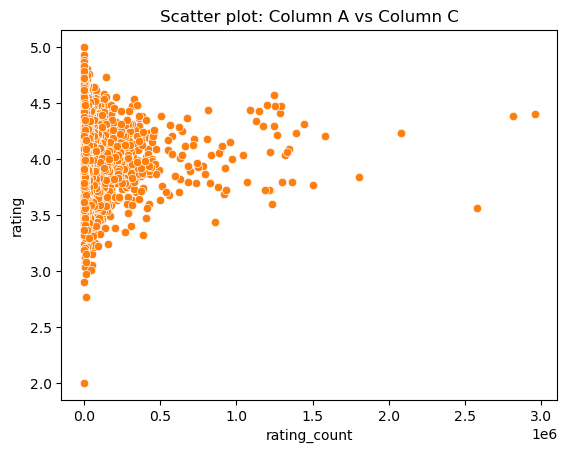

In [11]:
import matplotlib.pyplot as plt
sns.scatterplot(x='rating_count', y='rating', data=week03m_df2)
plt.title("Scatter plot: Column A vs Column C")
plt.show()

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
#### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [12]:
# your code here
# use many cells if you like to structure your code well

#to visualize these numerical features for the column "review_count"
mean_val = week03m_df2['review_count'].mean()
median_val = week03m_df2['review_count'].median()
std_val = week03m_df2['review_count'].std()
range_val = week03m_df2['review_count'].max() - week03m_df2['review_count'].min()

print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)
print("Range:", range_val)

Mean: 2374.3312197563823
Median: 936.0
Standard Deviation: 5493.093328445113
Range: 136455


In [13]:
#and, since we are not doing anything else with these values, we can just overwrite them for a different column
#to visualize these numerical features for the column "rating"
mean_val = week03m_df2['rating'].mean()
median_val = week03m_df2['rating'].median()
std_val = week03m_df2['rating'].std()
range_val = week03m_df2['rating'].max() - week03m_df2['rating'].min()

print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)
print("Range:", range_val)

Mean: 4.041997330218589
Median: 4.05
Standard Deviation: 0.26050908872172274
Range: 3.0


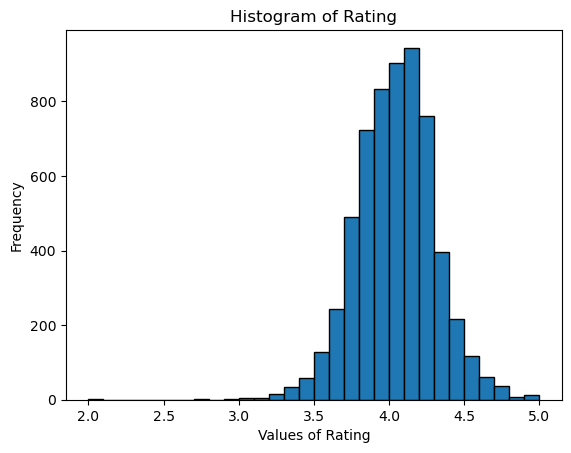

In [14]:
plt.hist(week03m_df2['rating'], bins=30, edgecolor='black')
plt.xlabel("Values of Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Rating")
plt.show()

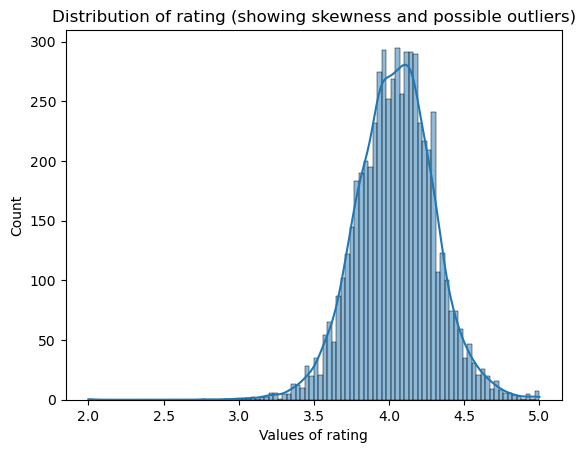

In [20]:
sns.histplot(week03m_df2['rating'], bins=100, kde=True)
plt.xlabel("Values of rating")
plt.title("Distribution of rating (showing skewness and possible outliers)")
plt.show()

In [18]:
week03m_df2['rating'].skew()

np.float64(-0.12004271591468958)

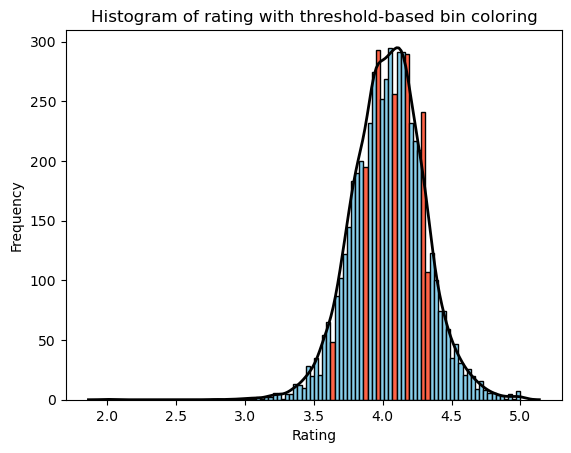

In [36]:
data = week03m_df2['rating']

# Compute histogram data
counts, bins, patches = plt.hist(data, bins=100, edgecolor='black')

# Compute KDE curve
kde = sns.kdeplot(data, bw_adjust=1).get_lines()[0]
x_kde, y_kde = kde.get_data()
plt.clf()  # clear the initial kde plot

# Choose a threshold (for example, 0.05)
threshold = 20

# Plot histogram again and color bins based on condition
counts, bins, patches = plt.hist(data, bins=100, edgecolor='black')

for count, patch, left, right in zip(counts, patches, bins[:-1], bins[1:]):
    # Find midpoint of the bin and KDE value there
    midpoint = (left + right) / 2
    kde_val = np.interp(midpoint, x_kde, y_kde)
    bin_width = right - left
    bin_expected_count = kde_val * bin_width * len(data)
   # print(bin_expected_count, count)
        
    # Color bins that go above the threshold
    if abs(bin_expected_count - count) > threshold:
        patch.set_facecolor('tomato')
    else:
        patch.set_facecolor('skyblue')

# Replot KDE curve on top
plt.plot(x_kde, y_kde * max(counts) / max(y_kde), color='black', lw=2)

plt.title("Histogram of rating with threshold-based bin coloring")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()